In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
hbar = 1.055*10**(-34)
c = 3*10**8
wav = 1064*10**(-9)
k = 2*np.pi/wav
na = 0.95

def calc_geometric_factor(na):
    thetamax = np.arcsin(na)
    C = 2 * ( 8 / 15 - (np.cos(thetamax)**(3/2) ) / 3 - (np.cos(thetamax)**(5/2) ) / 5 )
    D = 2 * ( 12 / 35 - (np.cos(thetamax)**(5/2) ) / 5 - (np.cos(thetamax)**(7/2) ) / 7 )
    return D / C

def get_imprecision_forward_z(p_sca, na_tl, na_cl):
    thetamax_cl = np.arcsin(na_cl)
    
    A = calc_geometric_factor(na_tl)  # Geometrical factor for z
    C = 2 * ( 8 / 15 - (np.cos(thetamax_cl)**(3/2) ) / 3 - (np.cos(thetamax_cl)**(5/2) ) / 5 )
    D = 2 * ( 12 / 35 - (np.cos(thetamax_cl)**(5/2) ) / 5 - (np.cos(thetamax_cl)**(7/2) ) / 7 )
    B_fw_z = (np.pi / 4) * (D - A * C)

    # Use Eq. (D8)  of PRA 100, 04821 (2019)
    s_zz_imp = (hbar*c / (k * p_sca)) * (np.pi * na_cl**2 / (48 * B_fw_z**2))
    return s_zz_imp

def get_imprecision_backward_z(p_sca, na_tl):
    thetamax_tl = np.arcsin(na_tl)
    
    D = 2 * ( 12 / 35 - (np.cos(thetamax_tl)**(5/2) ) / 5 - (np.cos(thetamax_tl)**(7/2) ) / 7 )
    B_bw_z = (np.pi / 2) * (D)

    # Use Eq. (D8)  of PRA 100, 04821 (2019)
    s_zz_imp = (hbar*c / (k * p_sca)) * (np.pi * na_tl**2 / (48 * B_bw_z**2))
    return s_zz_imp

def get_imprecision_forward_x(p_sca, na_cl):
    thetamax_cl = np.arcsin(na_cl)
    
    x = np.linspace(0, thetamax_cl, 10000)
    si = np.sin(x)
    co = np.cos(x)
    y = si**2*np.sqrt(co)*(1+2*co)/3
    B_fw_x = np.trapz(y, x)
    # Use Eq. (D8)  of PRA 100, 04821 (2019)
    s_xx_imp = (hbar*c / (k * p_sca)) * (np.pi * na_cl**2 / (48 * B_fw_x**2))
    return s_xx_imp

def get_imprecision_forward_y(p_sca, na_cl):
    thetamax_cl = np.arcsin(na_cl)
    
    x = np.linspace(0, thetamax_cl, 10000)
    si = np.sin(x)
    co = np.cos(x)
    y = si**2*np.sqrt(co)*(2+co)/3
    B_fw_y = np.trapz(y, x)
    # Use Eq. (D8)  of PRA 100, 04821 (2019)
    s_yy_imp = (hbar*c / (k * p_sca)) * (np.pi * na_cl**2 / (48 * B_fw_y**2))
    return s_yy_imp


In [28]:
nas = np.linspace(0.1, 0.95, 100)
imp_z_forward = np.empty(nas.size)

p_sca = 20*10**(-6)
A = calc_geometric_factor(nas)
S_zz_imp_perfect = (1 / (2/5 + A**2)) * (hbar * c / (4 * k)) / p_sca

for i, na in enumerate(nas):
    imp_z_forward[i] = get_imprecision_forward_z(p_sca, 0.95, na)

imp_z_backward = np.empty(nas.size)

for i, na in enumerate(nas):
    imp_z_backward[i] = get_imprecision_backward_z(p_sca, na)

S_xx_imp_perfect = 5 * (hbar * c / (4 * k)) / p_sca

imp_x_forward = np.empty(nas.size)

for i, na in enumerate(nas):
    imp_x_forward[i] = get_imprecision_forward_x(p_sca, na)

S_yy_imp_perfect = 5/2 * (hbar * c / (4 * k)) / p_sca

imp_y_forward = np.empty(nas.size)

for i, na in enumerate(nas):
    imp_y_forward[i] = get_imprecision_forward_y(p_sca, na)

C:\Users\thoma\AppData\Local\Temp\ipykernel_11984\1104972944.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  s_zz_imp = (hbar*c / (k * p_sca)) * (np.pi * na_cl**2 / (48 * B_fw_z**2))


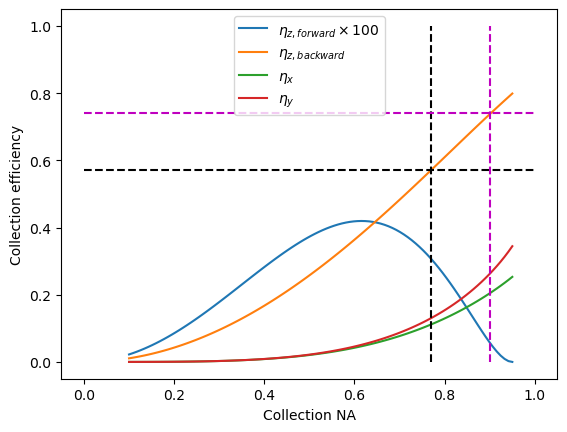

In [39]:
plt.plot(nas, S_zz_imp_perfect/imp_z_forward*100/2/np.pi, label = r'$\eta_{z, forward}  \times 100$')
plt.plot(nas, S_zz_imp_perfect/imp_z_backward/2/np.pi, label = '$\eta_{z, backward}$')
plt.plot(nas, S_xx_imp_perfect/imp_x_forward/2/np.pi, label = '$\eta_{x}$')
plt.plot(nas, S_xx_imp_perfect/imp_y_forward/2/np.pi, label = '$\eta_{y}$')
plt.plot([0.77, 0.77], [0, 1], 'k--')
plt.plot([0, 1], [0.57, 0.57], 'k--')
plt.plot([0.9, 0.9], [0, 1], 'm--')
plt.plot([0, 1], [0.74, 0.74], 'm--')
plt.xlabel('Collection NA')
plt.ylabel('Collection efficiency')
plt.legend()